In [101]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Import the titanic dataset
df = pd.read_csv("titanic_train.csv")
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
5                                     Moran, Mr. James    male   NaN      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
17                        Williams, Mr. Charles Eugene    male   NaN      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                             Masselmani, Mrs. Fatima  female   NaN

In [102]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [103]:
cols = list(df.columns)
cols
type(cols)
df.columns.values
target = df["Survived"].values
type(target)
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [104]:
# Remove all row with missing entries in column "Age"
num_missing = pd.isnull(df["Age"])
num_missing
df = df[pd.notnull(df["Age"])]
df = df[pd.notnull(df["Fare"])]
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
18            19         0       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
27            28         0       1   
30            31         0       1   
33            34         0       2   
34            35         0       1   
35            36         0       1   
37            38         0       3   
38            39         0       3   
..           ...       ...     ...   
856          857         1       1   
857          858         1       1   
858          859         1       3   
860          861         0       3   
861          862         0       2   
862          863         1       1   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
7                       Palsson, Master. Gosta Leonard    male   2.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
12                      Saundercock, Mr. William Henry    male  20.0      0   
13                         Andersson, Mr. Anders Johan    male  39.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                                Rice, Master. Eugene    male   2.0      4   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
20                                Fynney, Mr. Joseph J    male  35.0      0   
21                               Beesley, Mr. Lawrence    male  34.0      0   
22                         McGowan, Miss. Anna "Annie"  female  15.0

In [105]:
columns = df.columns
columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']
df = df[columns]
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [44]:
# Onehot encoding
df = pd.get_dummies(df, drop_first = False)
df.columns.values

array(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [85]:
features = ['Pclass','Age','SibSp','Parch','Fare','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
target = 'Survived'
X = df[features]
y = df[target]
X

Pclass   Age  SibSp  Parch      Fare  Sex_female  Sex_male  Embarked_C  \
0         3  22.0      1      0    7.2500           0         1           0   
1         1  38.0      1      0   71.2833           1         0           1   
2         3  26.0      0      0    7.9250           1         0           0   
3         1  35.0      1      0   53.1000           1         0           0   
4         3  35.0      0      0    8.0500           0         1           0   
6         1  54.0      0      0   51.8625           0         1           0   
7         3   2.0      3      1   21.0750           0         1           0   
8         3  27.0      0      2   11.1333           1         0           0   
9         2  14.0      1      0   30.0708           1         0           1   
10        3   4.0      1      1   16.7000           1         0           0   
11        1  58.0      0      0   26.5500           1         0           0   
12        3  20.0      0      0    8.0500           0         1           0   
13        3  39.0      1      5   31.2750           0         1           0   
14        3  14.0      0      0    7.8542           1         0           0   
15        2  55.0      0      0   16.0000           1         0           0   
16        3   2.0      4      1   29.1250           0         1           0   
18        3  31.0      1      0   18.0000           1         0           0   
20        2  35.0      0      0   26.0000           0         1           0   
21        2  34.0      0      0   13.0000           0         1           0   
22        3  15.0      0      0    8.0292           1         0           0   
23        1  28.0      0      0   35.5000           0         1           0   
24        3   8.0      3      1   21.0750           1         0           0   
25        3  38.0      1      5   31.3875           1         0           0   
27        1  19.0      3      2  263.0000           0         1           0   
30        1  40.0      0      0   27.7208           0         1           1   
33        2  66.0      0      0   10.5000           0         1           0   
34        1  28.0      1      0   82.1708           0         1           1   
35        1  42.0      1      0   52.0000           0         1           0   
37        3  21.0      0      0    8.0500           0         1           0   
38        3  18.0      2      0   18.0000           1         0           0   
..      ...   ...    ...    ...       ...         ...       ...         ...   
856       1  45.0      1      1  164.8667           1         0           0   
857       1  51.0      0      0   26.5500           0         1           0   
858       3  24.0      0      3   19.2583           1         0           1   
860       3  41.0      2      0   14.1083           0         1           0   
861       2  21.0      1      0   11.5000           0         1           0   
862       1  48.0      0      0   25.9292           1         0           0   
864       2  24.0      0      0   13.0000           0         1           0   
865       2  42.0      0      0   13.0000           1         0           0   
866       2  27.0      1      0   13.8583           1         0           1   
867       1  31.0      0      0   50.4958           0         1           0   
869       3   4.0      1      1   11.1333           0         1           0   
870       3  26.0      0      0    7.8958           0         1           0   
871       1  47.0      1      1   52.5542           1         0           0   
872       1  33.0      0      0    5.0000           0         1           0   
873       3  47.0      0      0    9.0000           0         1           0   
874       2  28.0      1      0   24.0000           1         0           1   
875       3  15.0      0      0    7.2250           1         0           1   
876       3  20.0      0      0    9.8458           0         1           0   
877       3  19.0      0      0    7.8958           0  

In [106]:
X_train, X_test,y_train,y_test = train_test_split(X, y)

In [107]:
X_test

Pclass    Age  SibSp  Parch      Fare  Sex_female  Sex_male  Embarked_C  \
305       1   0.92      1      2  151.5500           0         1           0   
492       1  55.00      0      0   30.5000           0         1           0   
90        3  29.00      0      0    8.0500           0         1           0   
500       3  17.00      0      0    8.6625           0         1           0   
432       2  42.00      1      0   26.0000           1         0           0   
390       1  36.00      1      2  120.0000           0         1           0   
853       1  16.00      0      1   39.4000           1         0           0   
646       3  19.00      0      0    7.8958           0         1           0   
261       3   3.00      4      2   31.3875           0         1           0   
333       3  16.00      2      0   18.0000           0         1           0   
690       1  31.00      1      0   57.0000           0         1           0   
172       3   1.00      1      1   11.1333           1         0           0   
556       1  48.00      1      0   39.6000           1         0           1   
483       3  63.00      0      0    9.5875           1         0           0   
546       2  19.00      1      0   26.0000           1         0           0   
51        3  21.00      0      0    7.8000           0         1           0   
520       1  30.00      0      0   93.5000           1         0           0   
53        2  29.00      1      0   26.0000           1         0           0   
164       3   1.00      4      1   39.6875           0         1           0   
618       2   4.00      2      1   39.0000           1         0           0   
847       3  35.00      0      0    7.8958           0         1           1   
139       1  24.00      0      0   79.2000           0         1           1   
133       2  29.00      1      0   26.0000           1         0           0   
587       1  60.00      1      1   79.2000           0         1           1   
307       1  17.00      1      0  108.9000           1         0           1   
350       3  23.00      0      0    9.2250           0         1           0   
817       2  31.00      1      1   37.0042           0         1           1   
212       3  22.00      0      0    7.2500           0         1           0   
395       3  22.00      0      0    7.7958           0         1           0   
462       1  47.00      0      0   38.5000           0         1           0   
..      ...    ...    ...    ...       ...         ...       ...         ...   
79        3  30.00      0      0   12.4750           1         0           0   
638       3  41.00      0      5   39.6875           1         0           0   
788       3   1.00      1      2   20.5750           0         1           0   
508       3  28.00      0      0   22.5250           0         1           0   
150       2  51.00      0      0   12.5250           0         1           0   
746       3  16.00      1      1   20.2500           0         1           0   
408       3  21.00      0      0    7.7750           0         1           0   
71        3  16.00      5      2   46.9000           1         0           0   
183       2   1.00      2      1   39.0000           0         1           0   
758       3  34.00      0      0    8.0500           0         1           0   
807       3  18.00      0      0    7.7750           1         0           0   
194       1  44.00      0      0   27.7208           1         0           1   
840       3  20.00      0      0    7.9250           0         1           0   
271       3  25.00      0      0    0.0000           0         1           0   
733       2  23.00      0      0   13.0000           0         1           0   
234       2  24.00      0      0   10.5000           0         1           0   
58        2   5.00      1      2   27.7500           1         0           0   
515       1  47.00      0      0   34.0208           0         1           0   
253  

In [108]:
# Train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [109]:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 12)

In [110]:
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [111]:
clf.feature_importances_

array([ 0.22481917,  0.13845426,  0.04254049,  0.00744459,  0.03340515,
        0.55333635,  0.        ,  0.        ,  0.        ,  0.        ])

In [112]:
clf.classes_

array([0, 1], dtype=int64)

In [113]:
clf.feature_importances_

array([ 0.22481917,  0.13845426,  0.04254049,  0.00744459,  0.03340515,
        0.55333635,  0.        ,  0.        ,  0.        ,  0.        ])

In [59]:
clf.tree_

In [117]:
eta = clf.score(X_train, y_train)
eta

0.82616822429906545

In [118]:
xi = clf.score(X_test, y_test)
xi

0.84916201117318435

In [119]:
y_pred = clf.predict(X_train)
y_pred


array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0,

In [120]:
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=12,
            splitter='best')

In [122]:
clf.score(X, y)

0.83053221288515411

In [125]:
df.shape

(714, 8)

In [126]:
y_pred = clf.predict(X)

In [127]:
df["y_pred"] = y_pred

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [128]:
df

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked  y_pred
0           0       3    male  22.0      1      0    7.2500        S       0
1           1       1  female  38.0      1      0   71.2833        C       1
2           1       3  female  26.0      0      0    7.9250        S       0
3           1       1  female  35.0      1      0   53.1000        S       1
4           0       3    male  35.0      0      0    8.0500        S       0
6           0       1    male  54.0      0      0   51.8625        S       0
7           0       3    male   2.0      3      1   21.0750        S       0
8           1       3  female  27.0      0      2   11.1333        S       0
9           1       2  female  14.0      1      0   30.0708        C       1
10          1       3  female   4.0      1      1   16.7000        S       1
11          1       1  female  58.0      0      0   26.5500        S       1
12          0       3    male  20.0      0      0    8.0500        S       0
13          0       3    male  39.0      1      5   31.2750        S       0
14          0       3  female  14.0      0      0    7.8542        S       1
15          1       2  female  55.0      0      0   16.0000        S       1
16          0       3    male   2.0      4      1   29.1250        Q       0
18          0       3  female  31.0      1      0   18.0000        S       0
20          0       2    male  35.0      0      0   26.0000        S       0
21          1       2    male  34.0      0      0   13.0000        S       0
22          1       3  female  15.0      0      0    8.0292        Q       1
23          1       1    male  28.0      0      0   35.5000        S       0
24          0       3  female   8.0      3      1   21.0750        S       0
25          1       3  female  38.0      1      5   31.3875        S       0
27          0       1    male  19.0      3      2  263.0000        S       0
30          0       1    male  40.0      0      0   27.7208        C       0
33          0       2    male  66.0      0      0   10.5000        S       0
34          0       1    male  28.0      1      0   82.1708        C       0
35          0       1    male  42.0      1      0   52.0000        S       0
37          0       3    male  21.0      0      0    8.0500        S       0
38          0       3  female  18.0      2      0   18.0000        S       0
..        ...     ...     ...   ...    ...    ...       ...      ...     ...
856         1       1  female  45.0      1      1  164.8667        S       1
857         1       1    male  51.0      0      0   26.5500        S       0
858         1       3  female  24.0      0      3   19.2583        C       0
860         0       3    male  41.0      2      0   14.1083        S       0
861         0       2    male  21.0      1      0   11.5000        S       0
862         1       1  female  48.0      0      0   25.9292        S       1
864         0       2    male  24.0      0      0   13.0000        S       0
865         1       2  female  42.0      0      0   13.0000        S       1
866         1       2  female  27.0      1      0   13.8583        C       1
867         0       1    male  31.0      0      0   50.4958        S       0
869         1       3    male   4.0      1      1   11.1333        S       1
870         0       3    male  26.0      0      0    7.8958        S       0
871         1       1  female  47.0      1      1   52.5542        S       1
872         0       1    male  33.0      0      0    5.0000        S       0
873         0       3    male  47.0      0      0    9.0000        S       0
874         1       2  female  28.0      1      0   24.0000        C       1
875         1       3  female  15.0      0      0    7.2250        C       1
876         0       3    male  20.0      0      0    9.8458        S       0
877         0       3    male  19.0      0      0    7.8958        S       0
879         1       1  female  56.0      0      1   83.1583        C       1
8

In [129]:
del df["y_pred"]

In [130]:
df

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked
0           0       3    male  22.0      1      0    7.2500        S
1           1       1  female  38.0      1      0   71.2833        C
2           1       3  female  26.0      0      0    7.9250        S
3           1       1  female  35.0      1      0   53.1000        S
4           0       3    male  35.0      0      0    8.0500        S
6           0       1    male  54.0      0      0   51.8625        S
7           0       3    male   2.0      3      1   21.0750        S
8           1       3  female  27.0      0      2   11.1333        S
9           1       2  female  14.0      1      0   30.0708        C
10          1       3  female   4.0      1      1   16.7000        S
11          1       1  female  58.0      0      0   26.5500        S
12          0       3    male  20.0      0      0    8.0500        S
13          0       3    male  39.0      1      5   31.2750        S
14          0       3  female  14.0      0      0    7.8542        S
15          1       2  female  55.0      0      0   16.0000        S
16          0       3    male   2.0      4      1   29.1250        Q
18          0       3  female  31.0      1      0   18.0000        S
20          0       2    male  35.0      0      0   26.0000        S
21          1       2    male  34.0      0      0   13.0000        S
22          1       3  female  15.0      0      0    8.0292        Q
23          1       1    male  28.0      0      0   35.5000        S
24          0       3  female   8.0      3      1   21.0750        S
25          1       3  female  38.0      1      5   31.3875        S
27          0       1    male  19.0      3      2  263.0000        S
30          0       1    male  40.0      0      0   27.7208        C
33          0       2    male  66.0      0      0   10.5000        S
34          0       1    male  28.0      1      0   82.1708        C
35          0       1    male  42.0      1      0   52.0000        S
37          0       3    male  21.0      0      0    8.0500        S
38          0       3  female  18.0      2      0   18.0000        S
..        ...     ...     ...   ...    ...    ...       ...      ...
856         1       1  female  45.0      1      1  164.8667        S
857         1       1    male  51.0      0      0   26.5500        S
858         1       3  female  24.0      0      3   19.2583        C
860         0       3    male  41.0      2      0   14.1083        S
861         0       2    male  21.0      1      0   11.5000        S
862         1       1  female  48.0      0      0   25.9292        S
864         0       2    male  24.0      0      0   13.0000        S
865         1       2  female  42.0      0      0   13.0000        S
866         1       2  female  27.0      1      0   13.8583        C
867         0       1    male  31.0      0      0   50.4958        S
869         1       3    male   4.0      1      1   11.1333        S
870         0       3    male  26.0      0      0    7.8958        S
871         1       1  female  47.0      1      1   52.5542        S
872         0       1    male  33.0      0      0    5.0000        S
873         0       3    male  47.0      0      0    9.0000        S
874         1       2  female  28.0      1      0   24.0000        C
875         1       3  female  15.0      0      0    7.2250        C
876         0       3    male  20.0      0      0    9.8458        S
877         0       3    male  19.0      0      0    7.8958        S
879         1       1  female  56.0      0      1   83.1583        C
880         1       2  female  25.0      0      1   26.0000        S
881         0       3    male  33.0      0      0    7.8958        S
882         0       3  female  22.0      0      0   10.5167        S
883         0       2    male  28.0      0      0   10.5000        S
884         0       3    male  25.0      0      0    7.0500        S
885         0       3  female  39.0      0      5   29.1250        Q
886

In [141]:
# Let's calculate confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
cm = confusion_matrix(y, y_pred)
cm

array([[412,  12],
       [109, 181]], dtype=int64)

In [134]:
tn = cm[0][0]

In [135]:
tn

412

In [136]:
fp = cm[0][1]

In [137]:
fp

12

In [138]:
clf.classes_

array([0, 1], dtype=int64)

In [142]:
# let's compute the precision-recall curve
p = clf.predict_proba(X)
p

array([[ 0.88993711,  0.11006289],
       [ 0.01123596,  0.98876404],
       [ 0.52542373,  0.47457627],
       ..., 
       [ 0.01123596,  0.98876404],
       [ 0.54545455,  0.45454545],
       [ 0.88993711,  0.11006289]])

In [149]:
m = len(p)
m

714

In [177]:
p_p = []

In [178]:
type(p_p)

list

In [186]:

for i in range(m):    
    row = p[i]
    p_p.append(row[1])
    
p_p = p[0:m, 1]
p_p
len(p_p)

714

In [187]:
precision, recall, threshold = precision_recall_curve(y, p_p)

In [188]:
precision

array([ 0.40960452,  0.41884058,  0.6827957 ,  0.71714286,  0.72254335,
        0.73652695,  0.74164134,  0.82936508,  0.93782383,  0.95375723,
        0.99047619,  1.        ,  1.        ])

In [189]:
recall

array([ 1.        ,  0.99655172,  0.87586207,  0.86551724,  0.86206897,
        0.84827586,  0.84137931,  0.72068966,  0.62413793,  0.56896552,
        0.35862069,  0.05517241,  0.        ])

<IPython.core.display.Javascript object>


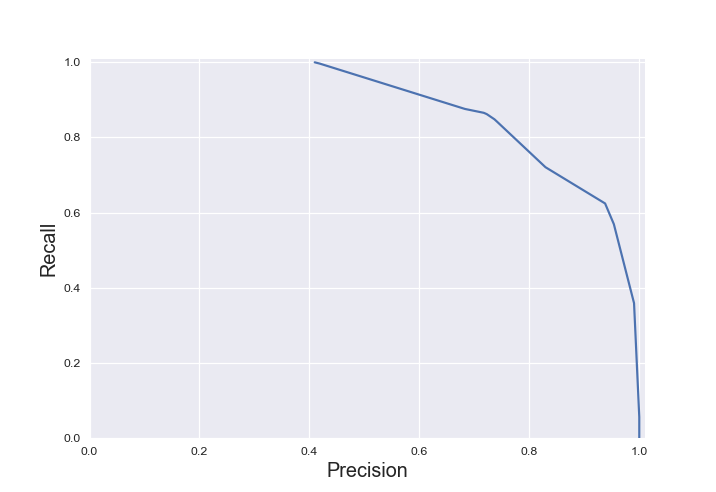

In [190]:
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
#plt.axes().set_aspect('equal')
plt.show()

In [193]:
# Compute AUC-ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y, p_p)

In [194]:
auc_roc = auc(fpr, tpr)

In [195]:
auc_roc

0.88659320104098893

<IPython.core.display.Javascript object>


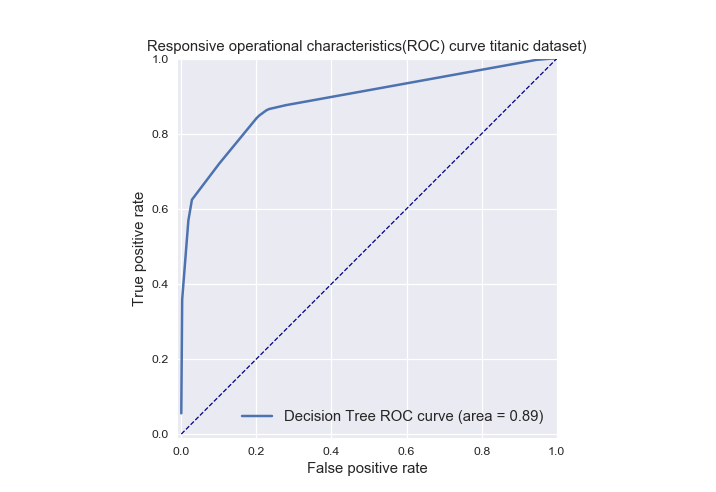

In [201]:
plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.00])
plt.plot(fpr, tpr, lw=2, label='Decision Tree ROC curve (area = {:0.2f})'.format(auc_roc))
plt.xlabel('False positive rate', fontsize=12)
plt.ylabel('True positive rate', fontsize=12)
plt.title('Responsive operational characteristics(ROC) curve titanic dataset)', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], lw=1, color = "navy", linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
